# Using Quandl to Capture Stock Prices

This Jupyter notebook demonstrates how to capture US stock prices from quandl.com.

Unfortunately, quandl has changed their pricing structure for stock prices.  The application programming interface (API) previously allowed free access to the latest stock prices.  Now, only stock information thru Dec 31, 2017, is available for free (you have to pay for data from 2018 onward).

Regardless, this notebook gives a demonstration of how to dynamically import data directly from a source via an API (as opposed to explicitly downloading a data file).

- Note:  Portions of this script are borrowed/adapted from https://stackoverflow.com/questions/36334665/how-to-plot-ohlc-candlestick-with-datetime-in-matplotlib

---

**Before continuing, you'll need to do the following:**

1. Install the quandl python package:
    ```
    pip install quandl
    ```
    
2. Get an API key from https://www.quandl.com/tools/python

---

In [1]:
# Enter your quandl API key here:
QUANDLKEY = "yourkeygoeshere"      # <-- FIXME...put your API key here.

# NOTE:  Here's how I like to store/use passwords for shared notebooks:
#'''
import os
QUANDLKEY = os.environ['QUANDLKEY']
#''';
# For more info about system variables, scroll down to Section 4 of this link:
# https://veroviz.org/documentation.html#installation

In [2]:
# We'll need to import several libraries:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import quandl
import numpy as np
import datetime as datetime

In [3]:
# Provide your quandl API key:
quandl.ApiConfig.api_key = QUANDLKEY

In [4]:
# Specify a stock ticker symbol and a date range:
# Use "YYY-MM-DD" format for dates.
tickerSymbol = "INTC"
startDate    = "2017-12-01"
endDate      = "2017-12-28"

# NOTE 1:  Your free API key will only provide access to data up to 2017-12-31
# NOTE 2:  See https://www.nyse.com/listings_directory/stock for a list of ticker symbols

In [5]:
# In this cell we are defining a function to help us format the x-axis of our plot.
def myDate(x,pos):
    try:
        return xdate[pos]
    except IndexError:
        return ''

In [6]:
# We will now use the quandl library to query for stock data.
# `quotes` will be a numpy ndarray.
dataSource = "EOD/%s" % (tickerSymbol)
quotes = quandl.get(dataSource, start_date=startDate, end_date=endDate, returns="numpy")

In [7]:
# You may want to uncomment some of the lines below to get a better
# understanding of the data captured in `quotes`.

'''
print(quotes)
print(quotes.dtype)
print(quotes['Open'])
print(quotes[0]['Open'])
print(quotes[0][1])
''';
print(quotes)

[('2017-12-01T00:00:00.000000000', 44.73, 44.84, 43.53 , 44.68, 26656272., 0., 1., 42.37052466, 42.47472224, 41.2338238 , 42.32316212, 26656272.)
 ('2017-12-04T00:00:00.000000000', 45.02, 45.3 , 44.33 , 44.49, 28000791., 0., 1., 42.64522737, 42.91045757, 41.99162437, 42.14318449, 28000791.)
 ('2017-12-05T00:00:00.000000000', 44.6 , 44.9 , 43.23 , 43.44, 30626850., 0., 1., 42.24738207, 42.53155728, 40.94964858, 41.14857123, 30626850.)
 ('2017-12-06T00:00:00.000000000', 43.14, 43.72, 42.67 , 43.45, 27710812., 0., 1., 40.86439602, 41.41380143, 40.41918818, 41.15804374, 27710812.)
 ('2017-12-07T00:00:00.000000000', 43.46, 43.6 , 42.78 , 43.08, 32708441., 0., 1., 41.16751625, 41.30013135, 40.52338576, 40.80756097, 32708441.)
 ('2017-12-08T00:00:00.000000000', 43.35, 43.58, 43.11 , 43.35, 23154749., 0., 1., 41.06331867, 41.28118633, 40.83597849, 41.06331867, 23154749.)
 ('2017-12-11T00:00:00.000000000', 43.28, 43.78, 43.25 , 43.66, 20425900., 0., 1., 40.99701112, 41.47063648, 40.9685936 , 41

In [8]:
# Sort the quotes in ascending order of date.
# This will sort "in place"
quotes.sort(order=['Date'])

In [9]:
# Convert the 'Date' column to a datetime
quotes['Date'].dtype = np.datetime64
quotes['Date']       = quotes['Date'].astype('datetime64', copy=False)

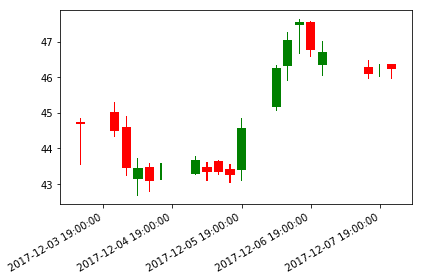

In [24]:
# In this cell we'll create a "candlestick" plot of the stock prices.
# Each day will be shown with a bar.
# Red (green) bars indicate that the stock closed lower (higher) than it opened.
# The thick bars show the opening and closing prices.
# The thin lines show the high and low prices.

fig, ax = plt.subplots()

# Specify the thickness for the thick bars and thin lines:
thickWidth = 0.8
thinWidth  = 0.1

# Create 2 numpy arrays, one for days where the stock closed higher than it opened, and vice versa:
pricesup   = quotes[quotes['Close'] >= quotes['Open']]
pricesdown = quotes[quotes['Close'] < quotes['Open']]

# Create a new array that will hold the timestamp for each day.
# We have to change the formatting so it shows properly on the plot.
xdate = [datetime.datetime.fromtimestamp(i.tolist()/1e9) for i in quotes['Date']]

# Specify the maximum number of labels to show on the plot.
# Sometimes you'll get fewer than this number shown.
ax.xaxis.set_major_locator(ticker.MaxNLocator(6))

# Plot green bars for days where closing price is higher than opening price:
plt.bar(pricesup['Date'], pricesup['Close'] - pricesup['Open'], thickWidth, bottom = pricesup['Open'], color='g')
plt.bar(pricesup['Date'], pricesup['High'] - pricesup['Close'], thinWidth, bottom = pricesup['Close'], color='g')
plt.bar(pricesup['Date'], pricesup['Low'] - pricesup['Open'], thinWidth, bottom = pricesup['Open'], color='g')

# Plot red bars for days where closing price is lower than opening price:
plt.bar(pricesdown['Date'], pricesdown['Open'] - pricesdown['Close'], thickWidth, bottom = pricesdown['Close'], color='r')
plt.bar(pricesdown['Date'], pricesdown['High'] - pricesdown['Open'], thinWidth, bottom = pricesdown['Open'], color='r')
plt.bar(pricesdown['Date'], pricesdown['Low'] - pricesdown['Close'], thinWidth, bottom = pricesdown['Close'], color='r')

# Format the x-axis with angled labels.
# `myDate` is a function that we defined above.
ax.xaxis.set_major_formatter(ticker.FuncFormatter(myDate))

fig.autofmt_xdate()
fig.tight_layout()

plt.show()

In [19]:
plt.bar?